### Import the data and tokenize to use with Keras.

* Keep only the 10000 most frequent words
* Limit each bill's title to a maximum length of 100 words
* Pad each sequence to be of length 100

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

train_data = pd.read_csv("data/congress_train.csv", encoding="ISO-8859-1").dropna(axis=0)
val_data = pd.read_csv("data/congress_val.csv", encoding="ISO-8859-1").dropna(axis=0)
test_data = pd.read_csv("data/congress_test.csv", encoding="ISO-8859-1").dropna(axis=0)

Using TensorFlow backend.


In [2]:
train = list(train_data['Title'])
val = list(val_data['Title'])
test = list(test_data['Title'])
train_label = to_categorical(train_data['Major'])
val_label = to_categorical(val_data['Major'])
test_label = to_categorical(test_data['Major'])

tokenizer = Tokenizer(10000)
tokenizer.fit_on_texts(train+val+test) #build the word index
train_seq = tokenizer.texts_to_sequences(train)
val_seq = tokenizer.texts_to_sequences(val)
test_seq = tokenizer.texts_to_sequences(test)

In [3]:
train_x = pad_sequences(train_seq, maxlen=100)
test_x = pad_sequences(test_seq, maxlen=100)
val_x = pad_sequences(val_seq, maxlen=100)

### Use a task-specific embedding layer with an appropriate number of output dimensions (select this yourself)
### Estimate a basic feed-forward network

In [4]:
train_label.shape

(278612, 24)

In [6]:
from keras.layers import Embedding, Flatten, Dense
from keras.models import Sequential

model = Sequential()
model.add(Embedding(10000, 16, input_length=100))
model.add(Flatten())
model.add(Dense(24, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
ff_hist = model.fit(train_x, train_label, validation_data=(val_x,val_label), epochs=30, batch_size=512, verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 278612 samples, validate on 69649 samples
Epoch 1/30
 - 4s - loss: 2.0487 - acc: 0.4357 - val_loss: 1.2945 - val_acc: 0.6740
Epoch 2/30
 - 2s - loss: 0.9950 - acc: 0.7438 - val_loss: 0.8337 - val_acc: 0.7819
Epoch 3/30
 - 2s - loss: 0.7383 - acc: 0.8031 - val_loss: 0.7163 - val_acc: 0.8094
Epoch 4/30
 - 2s - loss: 0.6469 - acc: 0.8255 - val_loss: 0.6667 - val_acc: 0.8243
Epoch 5/30
 - 2s - loss: 0.5970 - acc: 0.8384 - val_loss: 0.6410 - val_acc: 0.8288
Epoch 6/30
 - 2s - loss: 0.5633 - acc: 0.8469 - val_loss: 0.6236 - val_acc: 0.8341
Epoch 7/30
 - 2s - loss: 0.5381 - acc: 0.8532 - val_loss: 0.6124 - val_acc: 0.8371
Epoch 8/30
 - 2s - loss: 0.5180 - acc: 0.8580 - val_loss: 0.6052 - val_acc: 0.8397
Epoch 9/30
 - 2s - loss: 0.5016 - acc: 0.8627 - val_loss: 0.6007 - val_acc: 0.8413
Epoch 10/30
 - 2s - loss: 0.4877 - acc: 0.8662 - val_loss: 0.5991 - val_acc: 0.8408
Epoch 11/30
 - 2s - loss: 0.4754 - acc: 0.8695 - val_loss: 0.5956 - va

### Estimate a recurrent neural network (RNN) with a `layer_simple_rnn`

In [7]:
from keras.layers import SimpleRNN

rnn = Sequential()
rnn.add(Embedding(10000, 16, input_length=100))
rnn.add(SimpleRNN(16))
rnn.add(Dense(24, activation='softmax'))
rnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
rnn_hist = rnn.fit(train_x, train_label, validation_data=(val_x,val_label), epochs=30, batch_size=512, verbose=2)

Train on 278612 samples, validate on 69649 samples
Epoch 1/30
 - 37s - loss: 2.6050 - acc: 0.2293 - val_loss: 2.4154 - val_acc: 0.2980
Epoch 2/30
 - 36s - loss: 1.8849 - acc: 0.4654 - val_loss: 1.6173 - val_acc: 0.5486
Epoch 3/30
 - 36s - loss: 1.3385 - acc: 0.6412 - val_loss: 1.1635 - val_acc: 0.7007
Epoch 4/30
 - 36s - loss: 1.0504 - acc: 0.7320 - val_loss: 1.0319 - val_acc: 0.7372
Epoch 5/30
 - 36s - loss: 0.9355 - acc: 0.7624 - val_loss: 0.9663 - val_acc: 0.7525
Epoch 6/30
 - 36s - loss: 0.8730 - acc: 0.7795 - val_loss: 0.9743 - val_acc: 0.7472
Epoch 7/30
 - 36s - loss: 0.8325 - acc: 0.7899 - val_loss: 0.9258 - val_acc: 0.7647
Epoch 8/30
 - 37s - loss: 0.8025 - acc: 0.7986 - val_loss: 0.8761 - val_acc: 0.7813
Epoch 9/30
 - 37s - loss: 0.7787 - acc: 0.8045 - val_loss: 0.9027 - val_acc: 0.7713
Epoch 10/30
 - 39s - loss: 0.7584 - acc: 0.8091 - val_loss: 0.8612 - val_acc: 0.7859
Epoch 11/30
 - 38s - loss: 0.7409 - acc: 0.8139 - val_loss: 0.8667 - val_acc: 0.7841
Epoch 12/30
 - 38s - lo

### Estimate an RNN with an LSTM layer

In [8]:
from keras.layers import LSTM

lstm = Sequential()
lstm.add(Embedding(10000, 16, input_length=100))
lstm.add(LSTM(16))
lstm.add(Dense(24, activation='softmax'))
lstm.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
lstm_hist = lstm.fit(train_x, train_label, validation_data=(val_x,val_label), epochs=30, batch_size=512, verbose=2)

Train on 278612 samples, validate on 69649 samples
Epoch 1/30
 - 92s - loss: 2.5265 - acc: 0.2353 - val_loss: 2.1624 - val_acc: 0.3297
Epoch 2/30
 - 93s - loss: 1.8277 - acc: 0.4435 - val_loss: 1.5935 - val_acc: 0.5383
Epoch 3/30
 - 87s - loss: 1.3599 - acc: 0.6135 - val_loss: 1.3522 - val_acc: 0.6175
Epoch 4/30
 - 84s - loss: 1.0391 - acc: 0.7375 - val_loss: 0.9628 - val_acc: 0.7588
Epoch 5/30
 - 83s - loss: 0.8464 - acc: 0.7930 - val_loss: 0.8176 - val_acc: 0.8010
Epoch 6/30
 - 84s - loss: 0.7386 - acc: 0.8174 - val_loss: 0.7613 - val_acc: 0.8117
Epoch 7/30
 - 84s - loss: 0.6758 - acc: 0.8304 - val_loss: 0.7118 - val_acc: 0.8217
Epoch 8/30
 - 85s - loss: 0.6351 - acc: 0.8388 - val_loss: 0.6870 - val_acc: 0.8266
Epoch 9/30
 - 85s - loss: 0.6060 - acc: 0.8446 - val_loss: 0.6735 - val_acc: 0.8271
Epoch 10/30
 - 86s - loss: 0.5838 - acc: 0.8489 - val_loss: 0.6551 - val_acc: 0.8310
Epoch 11/30
 - 84s - loss: 0.5669 - acc: 0.8515 - val_loss: 0.6461 - val_acc: 0.8338
Epoch 12/30
 - 84s - lo

### Estimate an RNN with a GRU layer

In [9]:
from keras.layers import GRU

gru = Sequential()
gru.add(Embedding(10000, 16, input_length=100))
gru.add(GRU(16))
gru.add(Dense(24, activation='softmax'))
gru.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
gru_hist = gru.fit(train_x, train_label, validation_data=(val_x,val_label), epochs=30, batch_size=512, verbose=2)

Train on 278612 samples, validate on 69649 samples
Epoch 1/30
 - 74s - loss: 2.5749 - acc: 0.2110 - val_loss: 2.3292 - val_acc: 0.2721
Epoch 2/30
 - 72s - loss: 1.9738 - acc: 0.4160 - val_loss: 1.7018 - val_acc: 0.5242
Epoch 3/30
 - 78s - loss: 1.4687 - acc: 0.6112 - val_loss: 1.3065 - val_acc: 0.6662
Epoch 4/30
 - 71s - loss: 1.1608 - acc: 0.7062 - val_loss: 1.0825 - val_acc: 0.7287
Epoch 5/30
 - 72s - loss: 0.9731 - acc: 0.7592 - val_loss: 0.9486 - val_acc: 0.7678
Epoch 6/30
 - 72s - loss: 0.8653 - acc: 0.7872 - val_loss: 0.8623 - val_acc: 0.7852
Epoch 7/30
 - 71s - loss: 0.7917 - acc: 0.8043 - val_loss: 0.8059 - val_acc: 0.7979
Epoch 8/30
 - 71s - loss: 0.7372 - acc: 0.8160 - val_loss: 0.7614 - val_acc: 0.8097
Epoch 9/30
 - 72s - loss: 0.6945 - acc: 0.8242 - val_loss: 0.7296 - val_acc: 0.8151
Epoch 10/30
 - 72s - loss: 0.6611 - acc: 0.8306 - val_loss: 0.7049 - val_acc: 0.8185
Epoch 11/30
 - 71s - loss: 0.6344 - acc: 0.8362 - val_loss: 0.6816 - val_acc: 0.8229
Epoch 12/30
 - 71s - lo

### Estimate five additional neural network models with different configurations of hyperparameters (e.g. number of layers, number of hidden units, dropout, weight regularization, pre-trained word embeddings)

#### RNN 2 hidden layers

In [12]:
rnn2 = Sequential()
rnn2.add(Embedding(10000, 16, input_length=100))
rnn2.add(SimpleRNN(16, return_sequences=True))
rnn2.add(SimpleRNN(16))
rnn2.add(Dense(24, activation='softmax'))
rnn2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
rnn2_hist = rnn.fit(train_x, train_label, validation_data=(val_x,val_label), epochs=30, batch_size=512, verbose=2)

Train on 278612 samples, validate on 69649 samples
Epoch 1/30
 - 38s - loss: 0.5870 - acc: 0.8542 - val_loss: 0.8196 - val_acc: 0.8020
Epoch 2/30
 - 37s - loss: 0.5830 - acc: 0.8549 - val_loss: 0.8047 - val_acc: 0.8066
Epoch 3/30
 - 37s - loss: 0.5796 - acc: 0.8558 - val_loss: 0.8570 - val_acc: 0.7915
Epoch 4/30
 - 37s - loss: 0.5764 - acc: 0.8569 - val_loss: 0.8177 - val_acc: 0.8028
Epoch 5/30
 - 37s - loss: 0.5738 - acc: 0.8575 - val_loss: 0.8114 - val_acc: 0.8055
Epoch 6/30
 - 40s - loss: 0.5706 - acc: 0.8579 - val_loss: 0.8975 - val_acc: 0.7809
Epoch 7/30
 - 40s - loss: 0.5677 - acc: 0.8590 - val_loss: 0.8261 - val_acc: 0.8011
Epoch 8/30
 - 38s - loss: 0.5653 - acc: 0.8595 - val_loss: 0.8716 - val_acc: 0.7901
Epoch 9/30
 - 37s - loss: 0.5631 - acc: 0.8602 - val_loss: 0.8103 - val_acc: 0.8060
Epoch 10/30
 - 38s - loss: 0.5607 - acc: 0.8613 - val_loss: 0.8036 - val_acc: 0.8049
Epoch 11/30
 - 39s - loss: 0.5577 - acc: 0.8614 - val_loss: 0.8054 - val_acc: 0.8076
Epoch 12/30
 - 38s - lo

#### RNN 32 hidden units

In [13]:
rnn_moreUnits = Sequential()
rnn_moreUnits.add(Embedding(10000, 16, input_length=100))
rnn_moreUnits.add(SimpleRNN(32))
rnn_moreUnits.add(Dense(24, activation='softmax'))
rnn_moreUnits.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
rnn_moreUnits_hist = rnn.fit(train_x, train_label, validation_data=(val_x,val_label), epochs=30, batch_size=512, verbose=2)

Train on 278612 samples, validate on 69649 samples
Epoch 1/30
 - 38s - loss: 0.5259 - acc: 0.8686 - val_loss: 0.8074 - val_acc: 0.8105
Epoch 2/30
 - 38s - loss: 0.5254 - acc: 0.8695 - val_loss: 0.8543 - val_acc: 0.7974
Epoch 3/30
 - 37s - loss: 0.5239 - acc: 0.8697 - val_loss: 0.9037 - val_acc: 0.7879
Epoch 4/30
 - 38s - loss: 0.5228 - acc: 0.8702 - val_loss: 0.8148 - val_acc: 0.8099
Epoch 5/30
 - 37s - loss: 0.5214 - acc: 0.8707 - val_loss: 0.8201 - val_acc: 0.8069
Epoch 6/30
 - 39s - loss: 0.5210 - acc: 0.8706 - val_loss: 0.8160 - val_acc: 0.8079
Epoch 7/30
 - 38s - loss: 0.5187 - acc: 0.8712 - val_loss: 0.8456 - val_acc: 0.8001
Epoch 8/30
 - 38s - loss: 0.5184 - acc: 0.8711 - val_loss: 0.8258 - val_acc: 0.8044
Epoch 9/30
 - 37s - loss: 0.5178 - acc: 0.8710 - val_loss: 0.8397 - val_acc: 0.8028
Epoch 10/30
 - 37s - loss: 0.5170 - acc: 0.8715 - val_loss: 0.8391 - val_acc: 0.8026
Epoch 11/30
 - 37s - loss: 0.5163 - acc: 0.8716 - val_loss: 0.8198 - val_acc: 0.8080
Epoch 12/30
 - 37s - lo

#### RNN dropout rate=0.4

In [14]:
rnn_dropout = Sequential()
rnn_dropout.add(Embedding(10000, 16, input_length=100))
rnn_dropout.add(SimpleRNN(16, dropout=0.4))
rnn_dropout.add(Dense(24, activation='softmax'))
rnn_dropout.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
rnn_dropout_hist = rnn_dropout.fit(train_x, train_label, validation_data=(val_x,val_label), epochs=30, batch_size=512, verbose=2)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 278612 samples, validate on 69649 samples
Epoch 1/30
 - 40s - loss: 2.5662 - acc: 0.2221 - val_loss: 2.1629 - val_acc: 0.3543
Epoch 2/30
 - 38s - loss: 1.9975 - acc: 0.4074 - val_loss: 1.7863 - val_acc: 0.4853
Epoch 3/30
 - 39s - loss: 1.7550 - acc: 0.4923 - val_loss: 1.6093 - val_acc: 0.5522
Epoch 4/30
 - 58s - loss: 1.5732 - acc: 0.5552 - val_loss: 1.4337 - val_acc: 0.6107
Epoch 5/30
 - 38s - loss: 1.4673 - acc: 0.5883 - val_loss: 1.4457 - val_acc: 0.6042
Epoch 6/30
 - 39s - loss: 1.4033 - acc: 0.6073 - val_loss: 1.2619 - val_acc: 0.6598
Epoch 7/30
 - 38s - loss: 1.3606 - acc: 0.6216 - val_loss: 1.3240 - val_acc: 0.6409
Epoch 8/30
 - 38s - loss: 1.3332 - acc: 0.6303 - val_loss: 1.2310 - val_acc: 0.6710
Epoch 9/30
 - 38s - loss: 1.3048 - acc: 0.6386 - val_loss: 1.2089 - val_acc: 0.6828
Epoch 10/30
 - 38s - loss: 1.2845 - acc: 0.6457 - val_loss: 1.1636 - val_acc: 

#### LSTM with batchsize=1024

In [19]:
lstm64 = Sequential()
lstm64.add(Embedding(10000, 16, input_length=100))
lstm64.add(LSTM(16))
lstm64.add(Dense(24, activation='softmax'))
lstm64.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
lstm64_hist = lstm64.fit(train_x, train_label, validation_data=(val_x,val_label), epochs=30, batch_size=1024, verbose=2)

Train on 278612 samples, validate on 69649 samples
Epoch 1/30
 - 49s - loss: 2.6656 - acc: 0.2132 - val_loss: 2.2864 - val_acc: 0.3430
Epoch 2/30
 - 47s - loss: 2.0347 - acc: 0.4433 - val_loss: 1.8259 - val_acc: 0.5136
Epoch 3/30
 - 46s - loss: 1.6275 - acc: 0.5513 - val_loss: 1.4944 - val_acc: 0.5959
Epoch 4/30
 - 47s - loss: 1.3485 - acc: 0.6405 - val_loss: 1.2630 - val_acc: 0.6706
Epoch 5/30
 - 47s - loss: 1.1456 - acc: 0.7047 - val_loss: 1.0783 - val_acc: 0.7337
Epoch 6/30
 - 47s - loss: 0.9806 - acc: 0.7581 - val_loss: 1.0004 - val_acc: 0.7490
Epoch 7/30
 - 47s - loss: 0.8701 - acc: 0.7872 - val_loss: 0.9948 - val_acc: 0.7485
Epoch 8/30
 - 47s - loss: 0.7966 - acc: 0.8055 - val_loss: 0.8230 - val_acc: 0.7980
Epoch 9/30
 - 47s - loss: 0.7415 - acc: 0.8170 - val_loss: 0.8115 - val_acc: 0.7987
Epoch 10/30
 - 47s - loss: 0.6991 - acc: 0.8261 - val_loss: 0.7910 - val_acc: 0.8005
Epoch 11/30
 - 47s - loss: 0.6653 - acc: 0.8333 - val_loss: 0.7341 - val_acc: 0.8154
Epoch 12/30
 - 47s - lo

#### RNN L2_Norm regularizer=0.1

In [20]:
from keras import regularizers

rnn_l2 = Sequential()
rnn_l2.add(Embedding(10000, 16, input_length=100))
rnn_l2.add(SimpleRNN(16, recurrent_regularizer=regularizers.l2(0.1)))
rnn_l2.add(Dense(24, activation='softmax'))
rnn_l2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
rnn_l2_hist = rnn_l2.fit(train_x, train_label, validation_data=(val_x,val_label), epochs=30, batch_size=512, verbose=2)

Train on 278612 samples, validate on 69649 samples
Epoch 1/30
 - 41s - loss: 3.0459 - acc: 0.2230 - val_loss: 2.4359 - val_acc: 0.3063
Epoch 2/30
 - 40s - loss: 2.2477 - acc: 0.3612 - val_loss: 2.2069 - val_acc: 0.3869
Epoch 3/30
 - 40s - loss: 2.0785 - acc: 0.4195 - val_loss: 2.0389 - val_acc: 0.4339
Epoch 4/30
 - 40s - loss: 1.9834 - acc: 0.4539 - val_loss: 1.9742 - val_acc: 0.4669
Epoch 5/30
 - 40s - loss: 1.9099 - acc: 0.4799 - val_loss: 1.9123 - val_acc: 0.4888
Epoch 6/30
 - 40s - loss: 1.8315 - acc: 0.5212 - val_loss: 1.8444 - val_acc: 0.5433
Epoch 7/30
 - 40s - loss: 1.7102 - acc: 0.5796 - val_loss: 1.7017 - val_acc: 0.5912
Epoch 8/30
 - 39s - loss: 1.6302 - acc: 0.6110 - val_loss: 1.6744 - val_acc: 0.6076
Epoch 9/30
 - 39s - loss: 1.5866 - acc: 0.6257 - val_loss: 1.6285 - val_acc: 0.6193
Epoch 10/30
 - 39s - loss: 1.5553 - acc: 0.6347 - val_loss: 1.5964 - val_acc: 0.6303
Epoch 11/30
 - 39s - loss: 1.5309 - acc: 0.6436 - val_loss: 1.5836 - val_acc: 0.6367
Epoch 12/30
 - 40s - lo

### For each model, plot the validation loss and accuracy over each epoch.

In [24]:
lstm64_hist.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [33]:
val_loss = []; val_acc = []
hist_lst = [ff_hist, rnn_hist, lstm_hist, gru_hist, rnn2_hist, rnn_moreUnits_hist, rnn_dropout_hist, lstm64_hist, rnn_l2_hist]
name_lst = ['Basic forward feeding', 'Simple RNN', 'LSTM', 'GRU', 'Simple RNN with two layers', 
            'Simple RNN with 32 hidden units', 'Simple RNN with dropout = 0.4', 
            'LSTM with batchsize=1024', 'RNN with L2 regularization']
for e in hist_lst:
    val_loss.append(e.history['val_loss'])
    val_acc.append(e.history['val_acc'])

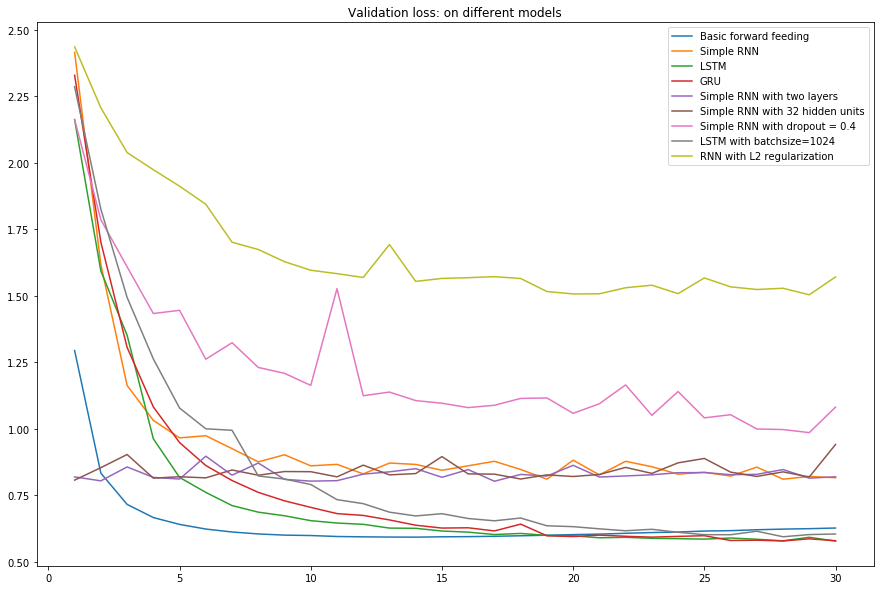

In [37]:
import matplotlib.pyplot as plt

epochs = range(1, 31)
plt.figure(figsize=(15, 10))
for i, loss in enumerate(val_loss):
    plt.plot(epochs, loss, label = name_lst[i])
plt.legend()
plt.title('Validation loss: on different models')
plt.show()

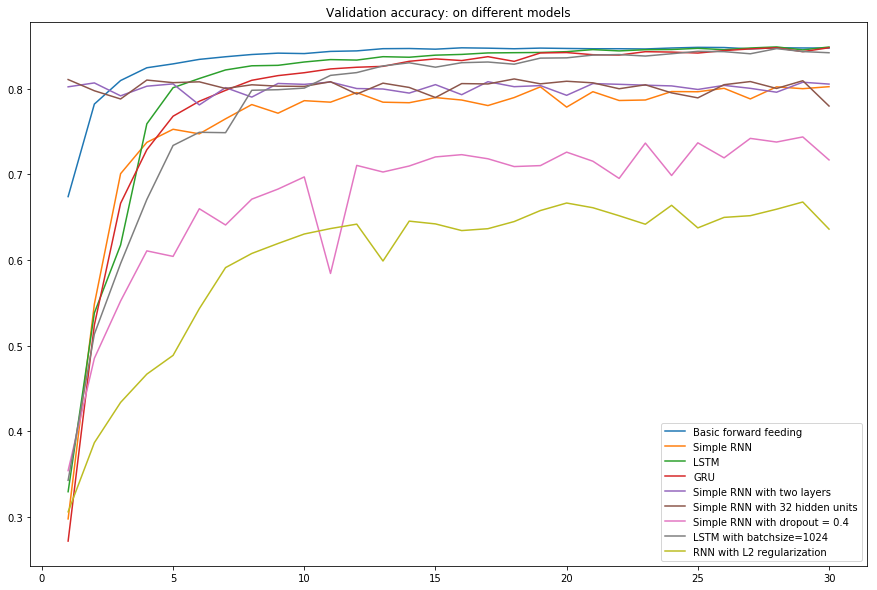

In [35]:
epochs = range(1, 31)
plt.figure(figsize=(15, 10))
for i, acc in enumerate(val_acc):
    plt.plot(epochs, acc, label = name_lst[i])
plt.legend()
plt.title('Validation accuracy: on different models')
plt.show()

GRU has the best performance.

### Select the best performing model based on the validation set and evaluate its performance using the test set. Assume that with hand-coding we can achieve a 95% accuracy rate. Would your neural network perform better or worse than hand-coding?

In [36]:
gru.evaluate(test_x, test_label)

38693/38693 [==============================] - 58s 1ms/step


[0.5844588515174253, 0.8481637505507353]

Our model has a 84.81% prediction accuracy on the test set, which is relatively inferior to the hand coding.